In [8]:
from tensorflow.keras import backend as K
import tensorflow as tf

# Check GPU availability
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/MyDrive/app/DATASET/'

datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    validation_split=0.2    # Split 20% for validation
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 960 images belonging to 4 classes.
Found 239 images belonging to 4 classes.


In [12]:
import cv2
import os

for folder in ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']:
    path = os.path.join(data_dir, folder)
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file))
        if img is not None:
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            cv2.imwrite(os.path.join(path, file), rgb_img)


In [13]:
import numpy as np
kernel = np.ones((3,3), np.uint8)

for folder in ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']:
    path = os.path.join(data_dir, folder)
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 50, 150)
        mask = cv2.dilate(edges, kernel, iterations=1)
        clean = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)
        cv2.imwrite(os.path.join(path, file), clean)


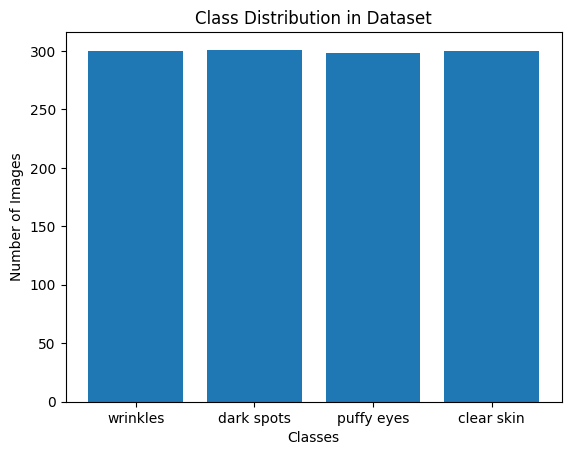

In [14]:
import matplotlib.pyplot as plt
import os

classes = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
counts = [len(os.listdir(os.path.join(data_dir, c))) for c in classes]

plt.bar(classes, counts)
plt.title("Class Distribution in Dataset")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()


In [15]:
import pandas as pd

data = []
for label, folder in enumerate(classes):
    path = os.path.join(data_dir, folder)
    for file in os.listdir(path):
        data.append([os.path.join(path, file), folder])

df = pd.DataFrame(data, columns=['image_path', 'label'])
df.to_csv('/content/drive/MyDrive/DermalScan_Dataset_Labeled.csv', index=False)


In [16]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=val_data, epochs=10)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.2140 - loss: 1.4152 - val_accuracy: 0.2510 - val_loss: 1.3873
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.2556 - loss: 1.3927 - val_accuracy: 0.2510 - val_loss: 1.4001
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.2516 - loss: 1.3998 - val_accuracy: 0.2510 - val_loss: 1.4113
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.2551 - loss: 1.3983 - val_accuracy: 0.2510 - val_loss: 1.4059
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.2488 - loss: 1.4052 - val_accuracy: 0.2510 - val_loss: 1.3978
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.2702 - loss: 1.3946 - val_accuracy: 0.2510 - val_loss: 1.4062
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.2120 - loss: 1.4058 - val_accuracy: 0.2469 - val_loss: 1.3895
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.2712 - loss: 1.3961 - val_accuracy: 0.2510 - val_l

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
data_dir = '/content/drive/MyDrive/app/DATASET/'
classes = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']


In [19]:
# ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,          # Random rotations
    width_shift_range=0.1,      # Horizontal shifts
    height_shift_range=0.1,     # Vertical shifts
    shear_range=0.1,            # Shear transformations
    zoom_range=0.1,             # Zoom
    horizontal_flip=True,       # Flip horizontally
    fill_mode='nearest',
    validation_split=0.2        # 20% for validation
)

# Training set
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # One-hot encoding
    subset='training'
)

# Validation set
val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 960 images belonging to 4 classes.
Found 239 images belonging to 4 classes.


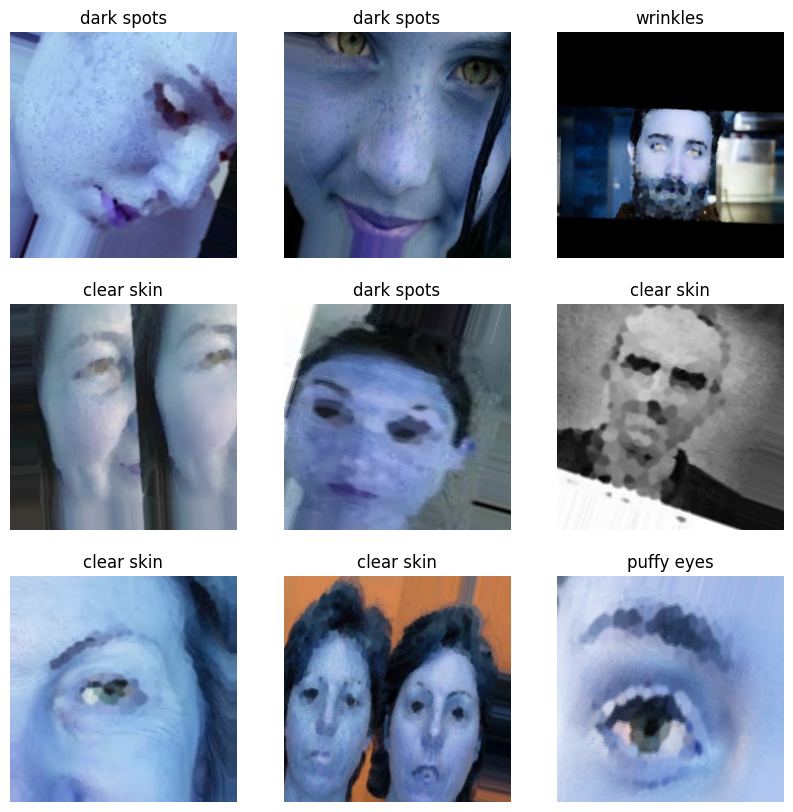

In [20]:
# Display a few augmented images
x_batch, y_batch = next(train_data)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(classes[np.argmax(y_batch[i])])
    plt.axis('off')
plt.show()


In [21]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Load pretrained EfficientNetB0 without top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained weights

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation='softmax')  # 4 classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.2574 - loss: 1.4054 - val_accuracy: 0.2510 - val_loss: 1.3984
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.2101 - loss: 1.4036 - val_accuracy: 0.2469 - val_loss: 1.3947
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.2447 - loss: 1.3988 - val_accuracy: 0.2510 - val_loss: 1.4232
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.2505 - loss: 1.3941 - val_accuracy: 0.2510 - val_loss: 1.3986
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.2572 - loss: 1.3995 - val_accuracy: 0.2510 - val_loss: 1.4222
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.2298 - loss: 1.4214 - val_accuracy: 0.2510 - val_loss: 1.3968
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.2374 - loss: 1.4001 - val_accuracy: 0.2469 - val_loss: 1.3948
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.2328 - loss: 1.3982 - val_accuracy: 0.2469 - v

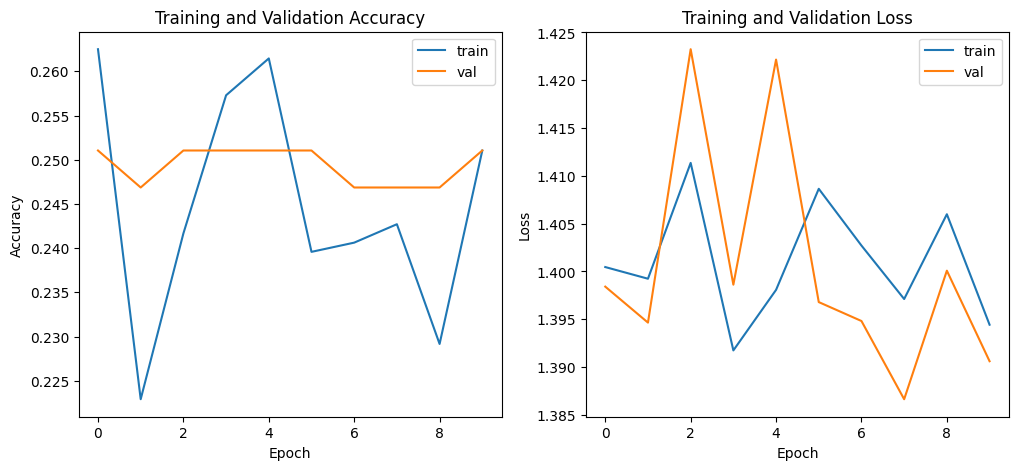

In [22]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
